## Introduction:

This notebook is just to practice CNN on an image of 3wolfmoon .. 

The implementation steps are:
1. Build Convolutional layer
2. Apply Max pooling 

In [89]:
import theano
from theano import tensor as T
from theano.tensor.nnet import conv
import numpy
from theano.tensor.signal import pool
import pylab
from PIL import Image

In [82]:
rng = numpy.random.RandomState(23455)
rng

In [61]:
# instantiate 4D tensor for input
input = T.tensor4(name='input')
input

input

In [62]:
# initialize shared variable for weights.
w_shp = (2, 3, 9, 9)
w_bound = numpy.sqrt(3 * 9 * 9)
W = theano.shared( numpy.asarray(rng.uniform(low=-1.0 / w_bound, high=1.0 / w_bound, size=w_shp), dtype=input.dtype), name ='W')
w_shp, w_bound, W ## W is tensor 

((2, 3, 9, 9), 15.588457268119896, W)

Initialize shared variable for bias (1D tensor) with random values

### IMPORTANT:
biases are usually initialized to zero.

However in this particular application, we simply apply the convolutional layer to
an image without learning the parameters. We therefore initialize them to random values to "simulate" learning.

In [63]:
b_shp = (2,)
b = theano.shared(numpy.asarray( rng.uniform(low=-.5, high=.5, size=b_shp), dtype=input.dtype), name ='b')
b_shp, b # b is also a tensor

((2,), b)

In [64]:
# build symbolic expression that computes the convolution of input with filters in w
conv_out = conv.conv2d(input, W)
conv_out

ConvOp{('imshp', (None, None, None)),('kshp', (None, None)),('nkern', None),('bsize', None),('dx', 1),('dy', 1),('out_mode', 'valid'),('unroll_batch', None),('unroll_kern', None),('unroll_patch', True),('imshp_logical', (None, None, None)),('kshp_logical', (None, None)),('kshp_logical_top_aligned', True)}.0

build symbolic expression to add bias and apply activation function, i.e. produce neural

A few words on ‘‘dimshuffle‘‘ :
‘‘dimshuffle‘‘ is a powerful tool in reshaping a tensor;

what it allows you to do is to shuffle dimension around
but also to insert new ones along which the tensor will be
broadcastable;
 
dimshuffle(’x’, 2, ’x’, 0, 1)
 This will work on 3d tensors with no broadcastable
 dimensions. The first dimension will be broadcastable,
 then we will have the third dimension of the input tensor as
 the second of the resulting tensor, etc. 
 
 If the tensor has
 shape (20, 30, 40), the resulting tensor will have dimensions
 (1, 40, 1, 20, 30). (AxBxC tensor is mapped to 1xCx1xAxB tensor)

More examples:
 dimshuffle(’x’) -> make a 0d (scalar) into a 1d vector
 
 dimshuffle(0, 1) -> identity
 
 dimshuffle(1, 0) -> inverts the first and second dimensions
 
 dimshuffle(’x’, 0) -> make a row out of a 1d vector (N to 1xN)
 
 dimshuffle(0, ’x’) -> make a column out of a 1d vector (N to Nx1)
 
 dimshuffle(2, 0, 1) -> AxBxC to CxAxB
 
 dimshuffle(0, ’x’, 1) -> AxB to Ax1xB
 
 dimshuffle(1, ’x’, 0) -> AxB to Bx1xA

In [65]:
output = T.nnet.sigmoid(conv_out + b.dimshuffle('x', 0, 'x', 'x'))
output

sigmoid.0

In [66]:
# create theano function to compute filtered images
f = theano.function([input], output)

## Work on 3wolfmoon image:

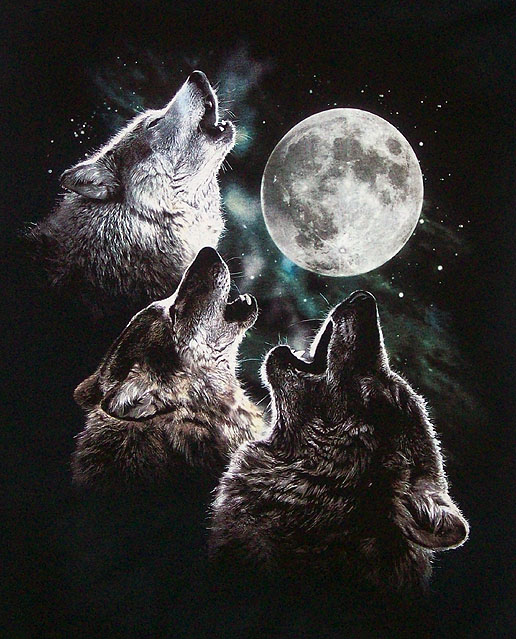

In [67]:
# open random image of dimensions 639x516
img = Image.open(open('/home/eman/PhD/Deep Learning Practice/Myown practice/3wolfmoon.jpg'))
img

In [68]:
# dimensions are (height, width, channel)
img = numpy.asarray(img, dtype='float64')/256
numpy.shape(img)

(639, 516, 3)

In [69]:
img

array([[[ 0.0859375 ,  0.0546875 ,  0.10546875],
        [ 0.109375  ,  0.0859375 ,  0.125     ],
        [ 0.08984375,  0.0859375 ,  0.109375  ],
        ..., 
        [ 0.07421875,  0.06640625,  0.0703125 ],
        [ 0.05859375,  0.0625    ,  0.078125  ],
        [ 0.0703125 ,  0.08203125,  0.1015625 ]],

       [[ 0.09375   ,  0.06640625,  0.09765625],
        [ 0.10546875,  0.0859375 ,  0.109375  ],
        [ 0.0859375 ,  0.0859375 ,  0.09375   ],
        ..., 
        [ 0.05859375,  0.04296875,  0.046875  ],
        [ 0.05859375,  0.0546875 ,  0.07421875],
        [ 0.06640625,  0.0703125 ,  0.08984375]],

       [[ 0.109375  ,  0.0859375 ,  0.09375   ],
        [ 0.109375  ,  0.09375   ,  0.09765625],
        [ 0.0859375 ,  0.0859375 ,  0.0859375 ],
        ..., 
        [ 0.0703125 ,  0.046875  ,  0.0546875 ],
        [ 0.09375   ,  0.07421875,  0.09765625],
        [ 0.06640625,  0.0625    ,  0.0859375 ]],

       ..., 
       [[ 0.06640625,  0.07421875,  0.03125   ],
        

In [70]:
# put image in 4D tensor of shape (1, 3, height, width)
img_ = img.transpose(2, 0, 1).reshape(1, 3, 639, 516)
filtered_img = f(img_)
numpy.shape(filtered_img)

(1, 2, 631, 508)

In [71]:
filtered_img

array([[[[ 0.40241881,  0.40654355,  0.4055438 , ...,  0.40616471,
           0.40412887,  0.40803469],
         [ 0.40503764,  0.40454624,  0.40255514, ...,  0.40410168,
           0.40127703,  0.40672139],
         [ 0.4048488 ,  0.40424305,  0.40137694, ...,  0.40229971,
           0.39961058,  0.40403959],
         ..., 
         [ 0.40157676,  0.40279892,  0.40051685, ...,  0.40413944,
           0.40253638,  0.40764975],
         [ 0.39907438,  0.40281999,  0.40160049, ...,  0.40376018,
           0.40362312,  0.40812447],
         [ 0.39959769,  0.40176656,  0.40133167, ...,  0.4050416 ,
           0.40502693,  0.40781804]],

        [[ 0.53532056,  0.53665257,  0.53609798, ...,  0.5426468 ,
           0.54248557,  0.53778314],
         [ 0.53131979,  0.53399161,  0.53577747, ...,  0.54136609,
           0.53864047,  0.53645637],
         [ 0.53378676,  0.53631299,  0.53704278, ...,  0.54111792,
           0.53638221,  0.53444876],
         ..., 
         [ 0.53535756,  0.531441

In [72]:
# plot original image and first and second components of output
pylab.subplot(1, 3, 1)
pylab.axis('off')
pylab.imshow(img)
pylab.gray()

Recall that the convOp output (filtered image) is actually a "minibatch", of size 1 here, so we take index 0 in the first dimension ..

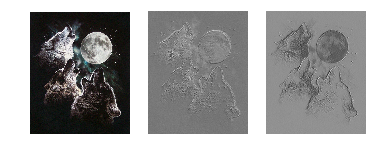

In [73]:
pylab.subplot(1, 3, 2); 
pylab.axis('off'); 
pylab.imshow(filtered_img[0, 0, :, :])
pylab.subplot(1, 3, 3); 
pylab.axis('off'); 
pylab.imshow(filtered_img[0, 1, :, :])
pylab.show()

The randomly initialized filter acts very much like an edge detector!

The next step is to apply .. Max pooling ..

## Max pooling:

Is a form of non-linear down-sampling. 

Max-pooling partitions the input image into a set of non-overlapping rectangles and, for each such sub-region,
outputs the maximum value.

max-pooling is a “smart” way of reducing the dimensionality of intermediate representations ..

Max-pooling is done in Theano by way of theano.tensor.signal.downsample.max_pool_2d that takes as input an N dimensional tensor (where N >= 2) and a downscaling factor and performs max-pooling over the 2 trailing dimensions of the tensor.

In [95]:
input = T.dtensor4('input')
maxpool_shape = (2, 2)
pool_out = pool.pool_2d(input, maxpool_shape, ignore_border=True)
f = theano.function([input],pool_out)

/home/eman/.theano/compiledir_Linux-4.10--generic-x86_64-with-Ubuntu-16.04-xenial-x86_64-2.7.12-64/tmpHL4niS/mod.cpp:5:31: fatal error: numpy/arrayobject.h: No such file or directory
compilation terminated.



00001	#include <Python.h>
00002	#include <iostream>
00003	#include "theano_mod_helper.h"
00004	#include <math.h>
00005	#include <numpy/arrayobject.h>
00006	#include <numpy/arrayscalars.h>
00007	#include <algorithm>
00008	//////////////////////
00009	////  Support Code
00010	//////////////////////
00011	
00012	    namespace {
00013	    struct __struct_compiled_op_13dae921a64587405ea98c7a26bdc790 {
00014	        PyObject* __ERROR;
00015	
00016	        PyObject* storage_V3;
00017	PyObject* storage_V5;
00018	PyObject* storage_V7;
00019	PyObject* storage_V1;
00020	        
00021	
00022	        __struct_compiled_op_13dae921a64587405ea98c7a26bdc790() {
00023	            // This is only somewhat safe because we:
00024	            //  1) Are not a virtual class
00025	            //  2) Do not use any virtual classes in the members
00026	            //  3) Deal with mostly POD and pointers
00027	
00028	            // If this changes, we would have to revise this, but for
00029	            // now

Exception: ('The following error happened while compiling the node', Pool{ignore_border=True, mode='max', ndim=2}(input, TensorConstant{(2,) of 2}, TensorConstant{(2,) of 2}, TensorConstant{(2,) of 0}), '\n', 'Compilation failed (return status=1): /home/eman/.theano/compiledir_Linux-4.10--generic-x86_64-with-Ubuntu-16.04-xenial-x86_64-2.7.12-64/tmpHL4niS/mod.cpp:5:31: fatal error: numpy/arrayobject.h: No such file or directory. compilation terminated.. ', "[Pool{ignore_border=True, mode='max', ndim=2}(input, TensorConstant{(2,) of 2}, TensorConstant{(2,) of 2}, TensorConstant{(2,) of 0})]")

In [97]:
invals = numpy.random.RandomState(1).rand(3, 2, 5, 5)
invals

array([[[[  4.17022005e-01,   7.20324493e-01,   1.14374817e-04,
            3.02332573e-01,   1.46755891e-01],
         [  9.23385948e-02,   1.86260211e-01,   3.45560727e-01,
            3.96767474e-01,   5.38816734e-01],
         [  4.19194514e-01,   6.85219500e-01,   2.04452250e-01,
            8.78117436e-01,   2.73875932e-02],
         [  6.70467510e-01,   4.17304802e-01,   5.58689828e-01,
            1.40386939e-01,   1.98101489e-01],
         [  8.00744569e-01,   9.68261576e-01,   3.13424178e-01,
            6.92322616e-01,   8.76389152e-01]],

        [[  8.94606664e-01,   8.50442114e-02,   3.90547832e-02,
            1.69830420e-01,   8.78142503e-01],
         [  9.83468338e-02,   4.21107625e-01,   9.57889530e-01,
            5.33165285e-01,   6.91877114e-01],
         [  3.15515631e-01,   6.86500928e-01,   8.34625672e-01,
            1.82882773e-02,   7.50144315e-01],
         [  9.88861089e-01,   7.48165654e-01,   2.80443992e-01,
            7.89279328e-01,   1.03226007e-01],

In [100]:
print 'With ignore_border set to True:'
print 'invals[0, 0, :, :] =\n', invals[0, 0, :, :]

With ignore_border set to True:
invals[0, 0, :, :] =
[[  4.17022005e-01   7.20324493e-01   1.14374817e-04   3.02332573e-01
    1.46755891e-01]
 [  9.23385948e-02   1.86260211e-01   3.45560727e-01   3.96767474e-01
    5.38816734e-01]
 [  4.19194514e-01   6.85219500e-01   2.04452250e-01   8.78117436e-01
    2.73875932e-02]
 [  6.70467510e-01   4.17304802e-01   5.58689828e-01   1.40386939e-01
    1.98101489e-01]
 [  8.00744569e-01   9.68261576e-01   3.13424178e-01   6.92322616e-01
    8.76389152e-01]]


In [102]:
pool_out = pool.pool_2d(input, maxpool_shape, ignore_border=False)
pool_out

Pool{ignore_border=False, mode='max', ndim=2}.0

In [103]:
f = theano.function([input],pool_out)
f

INFO (theano.gof.compilelock): Refreshing lock /home/eman/.theano/compiledir_Linux-4.10--generic-x86_64-with-Ubuntu-16.04-xenial-x86_64-2.7.12-64/lock_dir/lock
00001	#include <Python.h>
00002	#include <iostream>
00003	#include "theano_mod_helper.h"
00004	#include <math.h>
00005	#include <numpy/arrayobject.h>
00006	#include <numpy/arrayscalars.h>
00007	#include <algorithm>
00008	//////////////////////
00009	////  Support Code
00010	//////////////////////
00011	
00012	    namespace {
00013	    struct __struct_compiled_op_e714698c8a028a46a8ff00811e0bb712 {
00014	        PyObject* __ERROR;
00015	
00016	        PyObject* storage_V3;
00017	PyObject* storage_V5;
00018	PyObject* storage_V7;
00019	PyObject* storage_V1;
00020	        
00021	
00022	        __struct_compiled_op_e714698c8a028a46a8ff00811e0bb712() {
00023	            // This is only somewhat safe because we:
00024	            //  1) Are not a virtual class
00025	            //  2) Do not use any virtual classes in the members
00026	


00331	                             (long int) (PyArray_NDIM(tmp) >= 2 ?
00332	            PyArray_STRIDES(tmp)[PyArray_NDIM(tmp)-2] : -1),
00333	                             (long int) (PyArray_NDIM(tmp) >= 1 ?
00334	            PyArray_STRIDES(tmp)[PyArray_NDIM(tmp)-1] : -1)
00335	            );
00336	                {
00337	        __failure = 8;
00338	        if (!PyErr_Occurred()) {
00339	            PyErr_SetString(PyExc_RuntimeError,
00340	                "Unexpected error in an Op's C code. "
00341	                "No Python exception was set.");
00342	            }
00343	        goto __label_8;}
00344	            }
00345	            // This is a TypeError to be consistent with DEBUG_MODE
00346	            // Note: DEBUG_MODE also tells the name of the container
00347	            if (PyArray_TYPE((PyArrayObject*) py_V7) != NPY_INT64) {
00348	                PyErr_Format(PyExc_TypeError,
00349	                             "expected type_num %d (NPY_INT64) got %d",
00350	        

/home/eman/.theano/compiledir_Linux-4.10--generic-x86_64-with-Ubuntu-16.04-xenial-x86_64-2.7.12-64/tmpAUYXDC/mod.cpp:5:31: fatal error: numpy/arrayobject.h: No such file or directory
compilation terminated.




00726	            PyErr_SetString(PyExc_RuntimeError,
00727	                "Unexpected error in an Op's C code. "
00728	                "No Python exception was set.");
00729	            }
00730	        goto __label_2;}
00731	        }
00732	        
00733	      PyObject* old = PyList_GET_ITEM(storage_V1, 0);
00734	      {Py_XINCREF(py_V1);}
00735	      PyList_SET_ITEM(storage_V1, 0, py_V1);
00736	      {Py_XDECREF(old);}
00737	    }
00738	    
00739	        if (V1) {
00740	            Py_XDECREF(V1);
00741	        }
00742	        
00743	    {Py_XDECREF(py_V1);}
00744	    
00745	double __DUMMY_2;
00746	
00747	}
00748	
00749	            
00750	        if (__failure) {
00751	            // When there is a failure, this code puts the exception
00752	            // in __ERROR.
00753	            PyObject* err_type = NULL;
00754	            PyObject* err_msg = NULL;
00755	            PyObject* err_traceback = NULL;
00756	            PyErr_Fetch(&err_type, &err_msg, &err_traceback);
00757	 

Exception: ('The following error happened while compiling the node', Pool{ignore_border=False, mode='max', ndim=2}(input, TensorConstant{(2,) of 2}, TensorConstant{(2,) of 2}, TensorConstant{(2,) of 0}), '\n', 'Compilation failed (return status=1): /home/eman/.theano/compiledir_Linux-4.10--generic-x86_64-with-Ubuntu-16.04-xenial-x86_64-2.7.12-64/tmpAUYXDC/mod.cpp:5:31: fatal error: numpy/arrayobject.h: No such file or directory. compilation terminated.. ', "[Pool{ignore_border=False, mode='max', ndim=2}(input, TensorConstant{(2,) of 2}, TensorConstant{(2,) of 2}, TensorConstant{(2,) of 0})]")

In [104]:
print 'With ignore_border set to False:'
print 'invals[1, 0, :, :] =\n ', invals[1, 0, :, :]

With ignore_border set to False:
invals[1, 0, :, :] =
  [[ 0.01936696  0.67883553  0.21162812  0.26554666  0.49157316]
 [ 0.05336255  0.57411761  0.14672857  0.58930554  0.69975836]
 [ 0.10233443  0.41405599  0.69440016  0.41417927  0.04995346]
 [ 0.53589641  0.66379465  0.51488911  0.94459476  0.58655504]
 [ 0.90340192  0.1374747   0.13927635  0.80739129  0.39767684]]
